In [1]:
import tensorflow as tf 
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cfir = keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cfir.load_data()

In [4]:
x_train, x_test = x_train/255, x_test/255

In [19]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(x_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4770 - accuracy: 0.4740
Epoch 2/2
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1934 - accuracy: 0.5832


In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [9]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [10]:
loss,accuracy = cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.1087 - accuracy: 0.6107


In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [12]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [16]:
y_classes = []
for element in y_pred:
    y_classes.append(np.argmax(element))

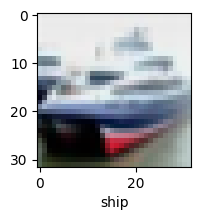

In [17]:
plot_sample(x_test, y_test,1)

In [18]:
classes[y_classes[1]]

'ship'